## Summarising three years of litter inventories

### Beach litter surveillance on Lake Geneva

1. Summary statistics and year over year comparisons for three years and 148 litter inventories on Lake Geneva
2. Comparison of individual results to a sample popultation

#### Purpose

1. Demonstrate the application of probability distributions to measuring effectiveness
2. Identify the minimum number of annual samples required to get a "good" distribution
3. Demonstrate the importance of having observations from a variety of groups and locations
4. Demonstrate our application of the python language in the following fields
   1. Data management  
   2. Data visualisation
   3. Data analysis

#### Usage:

1. These figures and scripts are intended to be used for publication and communication
2. Ask before you use
3. Give credit to _hammerdirt_, _EPFL Solid Waste Engineering_, _Swiss Litter Report_, _Geneva International school_, _Precious Plastic Léman_, _WWF.ch volunteers_

#### Tips:

1. The data is coming from the API you can do your own analysis
2. Type "help(get\_data)" in an empty cell to see the functions written for this workbook
3. Type inspect.getsource(function) to see the function source code
4. Check the requirements.yml file in the repo if this work book doesn't run right, you may need to update something.

#### Contact:

1. roger@hammerdirt.ch
2. twitter @hammerdirt
3. https://mwshovel.pythonanywhere.com/

In [1]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import json
import inspect
from IPython.display import display
# specific local imports
import get_data
from get_data import *

### Introduction:

#### Litter surveillance on the Lake:

Freshwater systems are considered to be principal routes of transmission of anthropogenic litter (AL) to the oceans. However in relation to the ocean, accumulation and transport of AL is rarely studied in freshwater systems{3}. Current studies are not comparable because protocols for freshwater systems have yet to be standardized{4}. Although public education and outreach are key components of the swiss litter prevention program, there is no publicly or privately funded systematic surveillance of AL on swiss waterways.

The project on Lake Geneva was designed to fill that Knowledge gap by providing data using an established protocol that was recognized by European member states: Marine Litter Watch (MLW) or OSPAR. Both systems are designed to be implemented at the local level, require minimal financial resources and put the “citizen” at the center of data collection.

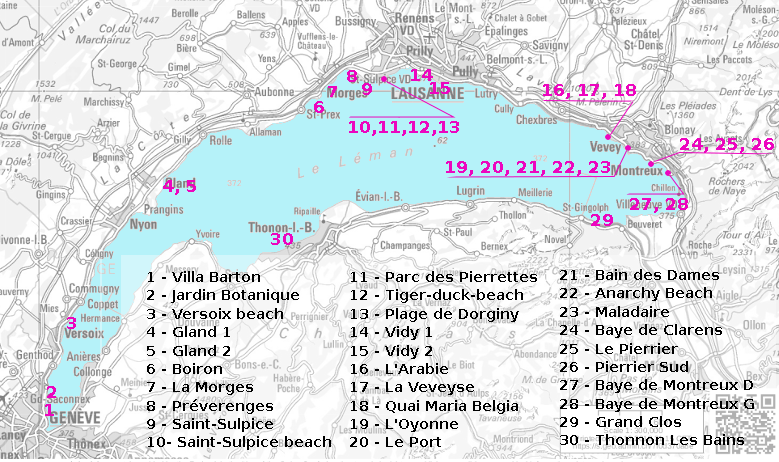

## Getting data and formatting

### Retrieve data from the API

The API is open, data can be retrieved easily by formatting the the search URL.

1. Define the URLS
2. Use the functions in the get_data import
3. Get the pcs/m values in a df

For further information https://mwshovel.pythonanywhere.com/dirt/api_home.html

In [2]:
# urls
urlLakeDailyTotals = "http://mwshovel.pythonanywhere.com/dirt/daily-total/Lac-Léman/?format=json"
urlLakeCodeData = "http://mwshovel.pythonanywhere.com/dirt/codes/Lac-Léman/?format=json"
urlBeachInfo = "http://mwshovel.pythonanywhere.com/dirt/beaches/Lac-Léman/?format=json"

# F getData() converts the from json to a data frame
lakeDailyTotals = getData(urlLakeDailyTotals)
lakeCodeTotals = getData(urlLakeCodeData)
lakeBeaches = getData(urlBeachInfo)

# add a pcs/m column
lakeDailyPcsM = pcs_m(lakeDailyTotals)
lakeCodePcsM = pcs_m(lakeCodeTotals)

# get the log of the pcs/m column
lakeDailyPcsM = logOfPcsMeter(lakeDailyPcsM )

### Check data for proper aggregation

For the puposes of this summary, the observations are being aggregated into the following groups:

1. MCBP - "Montreux Clean Beach Project": hammerdirt staff
   1. https://mwshovel.pythonanywhere.com/
2. SLR - "Swiss Litter Report": STOPPP and WWF volunteers
   1. http://www.stoppp.org/
3. SWE - "Solid Waste Engineering": Ecole Polytechnique Federal de Lausanne
   1. http://edu.epfl.ch/coursebook/en/solid-waste-engineering-ENV-500
4. PC - "Precious Collect": Precious Plastic Léman
   1. https://preciousplasticleman.ch/
5. GIS - "École International de Genéve": Students from the third grade class
   1. https://www.ecolint.ch/

#### There are three errors

1. The "SWE" beaches are either included in "tiger-duck" or "MCBP"
2. "mcbp" should be "MCBP"
3. Versoix beach should be attributed to GIS

#### fix that*:

*These changes do not affect the data stored online

In [3]:
sweBeaches = [(['Parc-des-Pierrettes','Plage-de-St-Sulpice', "Tiger-duck-beach", "Saint-Sulpice"], "SWE"), (["Versoix"], "GIS")]
changeProjects = ["mcbp"]
changeProject(sweBeaches, changeProjects, lakeBeaches)
# that should be good, now SWE and GIS will show up as projects
projectBeaches, projectList = getProjectBeaches(lakeBeaches) 

## Year over year results

The samples vary both in frequency and location. This is not by design it is a __by-product of any long-term project that is unfunded and reliant on volunteer resources to account for costs such as time and transportation.__ 

As a result not all locations were sampled throughout the the three year period and the number of samples per location ranges from 1 to 18. The data set that results is a collection of geographical clusters that are themselves composed of a series of samples that vary both in location (within a subregion) and frequency.

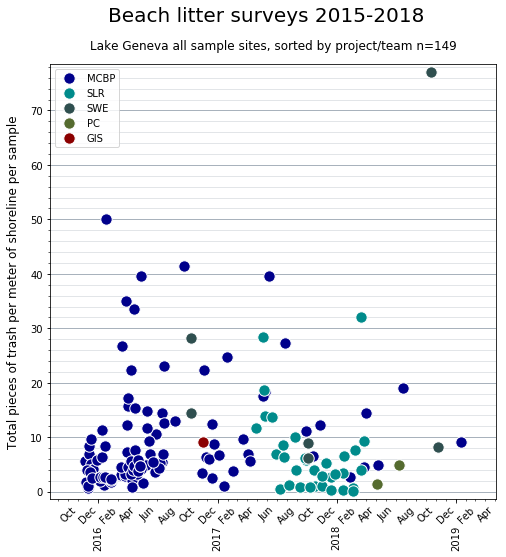

In [4]:
# Organize the data and assign values to the projects:
beachProjectDict = {vX:k for k,v in projectBeaches.items() for vX in v}

# Map those values to the data set
lakeDailyPcsM["Project"] = lakeDailyPcsM["location"].map(beachProjectDict)

# Change the dates from string to datetime stamp:
lakeDailyPcsM["date"] = pd.to_datetime(lakeDailyPcsM["date"])

# Draw the chart:
makeTimeSeriesAll((8,8),lakeDailyPcsM, projectList, "graphs/distributions/threeYearScatter.svg") 

## Participation and attribtution of "work"*

Through November 2018 there were five organisations that participated in the beah litter surveillance prorgram on the lake. All volunteers or "volunteered" (students). Understanding the results means understanding who collected the data.

The term "project" refers to a group or entity that participated in the surveillance.

1. Surveys per project
   1. Total number of surveys per project
   2. Number of beaches per project
2. Surveys per year
   1. Number of surveys per year
   
#### *This applies only to data in the system, if a collection was done but the data never submitted it will not be included in this survey.

#### Number of surveys per project:

In [5]:
operationsPerProject = surveysPerProject(projectList, projectBeaches, lakeDailyPcsM)
display(operationsPerProject)

MCBP    106
SLR      33
SWE       6
PC        2
GIS       1
dtype: int64

#### Number of unique locations surveyed per project:

In [6]:
projectBeachCount = lakeBeaches.location.groupby(lakeBeaches.project_id).count()
display(projectBeachCount)

project_id
GIS      1
MCBP    21
PC       1
SLR      4
SWE      4
Name: location, dtype: int64

The image below is a compilation of output from the function  _beachSamplesYear(tuples[x], n, beachColor)_  where x is the tuple number and n is the year number(see code block below). you will have to load the SVG output into an image editor and combined.

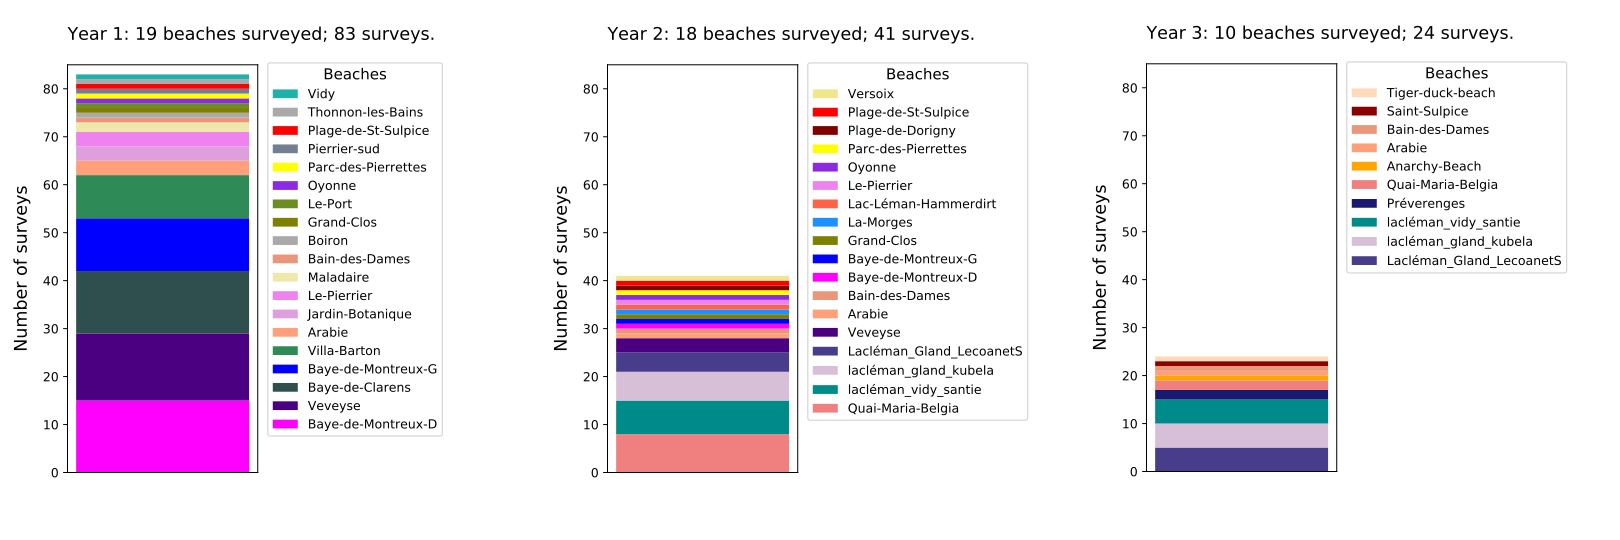

In [7]:
# this gets hidden on output

# making the barcharts

# Get the data by year and grab the location column
locations = makeYearResults(["2016-11-15", "2017-11-15", "2018-11-15"],lakeDailyPcsM, "location")

# Get the unique beach names in:
beachListAll = list(lakeDailyPcsM.location.unique())

# Pull some random colors from the matplotlib library:
colorBeach = ['blue', 'fuchsia', 'olive', 'darkslategrey', 'violet', 'darkgrey',
              'slategrey', 'darkgray', 'indigo', 'lightsalmon', 'darksalmon',
              'palegoldenrod', 'seagreen', 'blueviolet', 'olivedrab', 'plum',
              'lightseagreen', 'red', 'yellow', 'khaki', 'lightcoral', 'maroon',
              'dodgerblue', 'orange', 'thistle', 'darkslateblue', 'tomato',
              'darkcyan', 'midnightblue', 'peachpuff', 'darkred'
             ]
# Assign a color to each location:
beachColor = dict(zip(beachListAll,colorBeach))

# Use the Counter method and calculate bar heights/year
tuples =  countFrequency(locations)

# Load those results into the charting function
# they are saved in a folder: graphs/barCharts/yearX.svg where x is the year number
beachSamplesYear(tuples[0], 1, beachColor)
beachSamplesYear(tuples[1], 2, beachColor)
beachSamplesYear(tuples[2], 3, beachColor)

### Surveys per project per year and average pieces/per meter:

In [8]:
dfSurveysProject=pd.DataFrame(surveysProjectYear(["2016-11-15", "2017-11-15", "2018-11-15"],
                                                 projectList, projectBeaches, lakeDailyPcsM))
display(dfSurveysProject)

0
Year Project                     
1    MCBP    Surveys        81.00
             Average pcs/m   8.40
     SLR     Surveys         0.00
             Average pcs/m   0.00
     SWE     Surveys         2.00
             Average pcs/m  21.30
     PC      Surveys         0.00
             Average pcs/m   0.00
     GIS     Surveys         0.00
             Average pcs/m   0.00
2    MCBP    Surveys        20.00
             Average pcs/m  12.48
     SLR     Surveys        18.00
             Average pcs/m   7.92
     SWE     Surveys         2.00
             Average pcs/m   7.52
     PC      Surveys         0.00
             Average pcs/m   0.00
     GIS     Surveys         1.00
             Average pcs/m   9.14
3    MCBP    Surveys         5.00
             Average pcs/m   9.11
     SLR     Surveys        15.00
             Average pcs/m   5.29
     SWE     Surveys         2.00
             Average pcs/m  42.61
     PC      Surveys         2.00
             Average pcs/m   3.14
     GIS     Surveys         0.00
             Average pcs/m   0.00

#### Discussion:

The number of surveys and the number of locations is in steady decline. Principally due to the lack of participation by hammerdirt staff*. Only two of the locations surveyed in the first year were revisited in the third year.

In terms of variety of observations the second has the greatest variety of surveys. In year two no group is respnsible for mopre than 50% of the surveys. Year two provides both geographic and demographic variety of the observations. The similarities with the distribution of values to the first year should not be overlooked. On the otherhand in the third year there are only 24 surveys, 15 of which come from the same group: SLR. In the first year MCBP was responsible for 81/83 surveys.

*After the first year, hammerdirt was primarily active in developing the online portal, API and visualisation of data.

In [9]:
# this gets hidden on output

putListExcel([{"beachesPerProject":projectBeachCount},
              {"surveysPerProject":operationsPerProject},
             {"surveysProjectYear":dfSurveysProject}], "data/projectStats.xlsx")

## Distribution of results

### Histogram of results

1. Empirical
2. log transformation


#### Histogram all results, empirical data in pcs/m

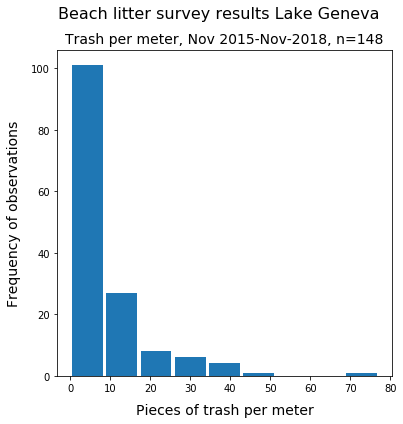

In [10]:
makeHist(lakeDailyPcsM.pcs_m, 9, (6, 6),"Trash per meter, Nov 2015-Nov-2018, n=", "Beach litter survey results Lake Geneva", "Pieces of trash per meter", "Frequency of observations", "graphs/histograms/pcsMhist.svg")

#### Histogram of all results,  log(pcs/m of trash):

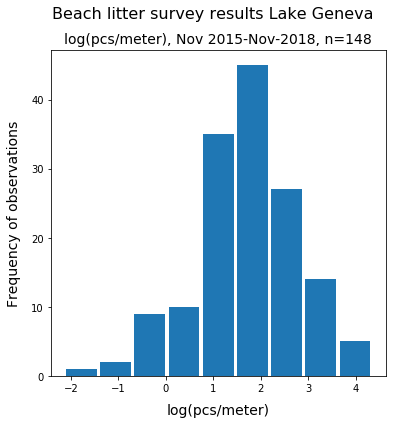

In [11]:
makeHist(lakeDailyPcsM.ln_pcs, 9, (6, 6),"log(pcs/meter), Nov 2015-Nov-2018, n=", "Beach litter survey results Lake Geneva", "log(pcs/meter)", "Frequency of observations", "graphs/histograms/logPcsMhist.svg")

### Year over year distribution

1. Log transform


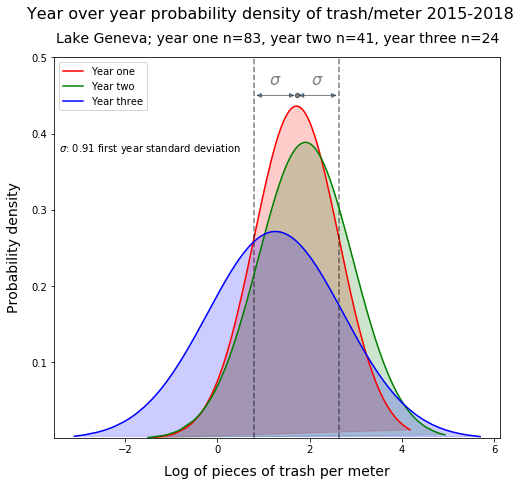

In [12]:
# Get the data by date groups:
xS = makeYearResults(["2016-11-15", "2017-11-15", "2018-11-15"],lakeDailyPcsM, "ln_pcs")

# Turn that into x,y coordinates
Data = makeXandY(xS)

# Give it a six in inches
figSize = (8,7)

# Pick your colors
colors = ["r", "g", "b"]

# Admin information
labels = ["Year one", "Year two", "Year three"]
title = "Year over year probability density of trash/meter 2015-2018"
subTitle = "Lake Geneva; year one n=83, year two n=41, year three n=24"
saveFig = "graphs/distributions/logYearOverYear.svg"

# Draw the chart:
aveStd = makeYearOverYear(Data, figSize, colors, labels, title, subTitle, saveFig)


#### Discussion

All surveys reported some trash. The quantities vary from 0.12pcs/m to 77.06pcs/m. __The non transformed data__ is summarised as follows :

1. mean       9.160844
2. std       10.752655
3. min        0.117647
4. 25%        3.183535
5. 50%        5.526347
6. 75%       11.240594
7. max       77.055556

The mean is almost double the median and the innerquartile range is less than the standard deviation.  Suggesting that there are some extreme values pulling the tail to the positive side. Specifically one survey by SWE at 77pcs/m 

__The transformed data__ is summarised as follows:

1. mean       1.695891
2. std        1.078434
3. min       -2.140066
4. 25%        1.157820
5. 50%        1.709305
6. 75%        2.419525
7. max        4.344527

The transformation shifts the mean to the left of the median. Bringing the distribution closer to normal but with a negative skew. This can be explained by the series of surveys in Gland (SLR) which consistently reported the lowest pcs/m values in year two and three.

__Assumption: These values tend to a normal distribution.__

The results were seperated by year (starting November 15 each year). The mean and standard deviation were used to generate a distribution based on a random normal distribution using _numpy.random.normal(loc, scale, n)_. 1000 samples were drawn.

When the averages from year two (1.91) and year three (1.25) are compared to year one they both fall within one standard deviation of the mean of year one(1.71).

In [13]:
# this gets hidden on output
# get the data:
yearOnePcs = {"YearOnePcsM":lakeDailyPcsM[lakeDailyPcsM.date < "2016-11-15"]}
yearOneStats = {"YearOneStats":lakeDailyPcsM[lakeDailyPcsM.date < "2016-11-15"].describe()}
yearTwoPcs = {"YearTwoPcsM":lakeDailyPcsM[(lakeDailyPcsM.date >= "2016-11-15")&(lakeDailyPcsM.date < "2017-11-15")]}
yearTwoStats = {"YearTwoStats":lakeDailyPcsM[(lakeDailyPcsM.date >= "2016-11-15")&(lakeDailyPcsM.date < "2017-11-15")].describe()}
yearThreePcs = {"YearThreePcsM":lakeDailyPcsM[(lakeDailyPcsM.date >= "2017-11-15")&(lakeDailyPcsM.date < "2018-11-15")]}
yearThreeStats = {"YearThreeStats":lakeDailyPcsM[(lakeDailyPcsM.date >= "2017-11-15")&(lakeDailyPcsM.date < "2018-11-15")].describe()}

# put all that in a list
byYear = [yearOnePcs, yearOneStats, yearTwoPcs, yearTwoStats, yearThreePcs, yearThreeStats]

# put this in an excel workbook
putListExcel(byYear, "data/PiecesMeterYear.xlsx")

## Defining a population

### Compare the distributions of SLR vs MCBP

#### MCBP and SLR account for 139 of the 148 surveys

The surveys from MCBP cover all regions of the lake, including the only survey in France. There was no change in personnel and MCBP has surveys in all three years.

SLR Surveys account for three locations in year two and three. The personnel were trained by the WWF and committed to doing 12 surveys a year.

Given these reasons we compared the distribtution of results between these two projects. Using the same method as above. The results are below:

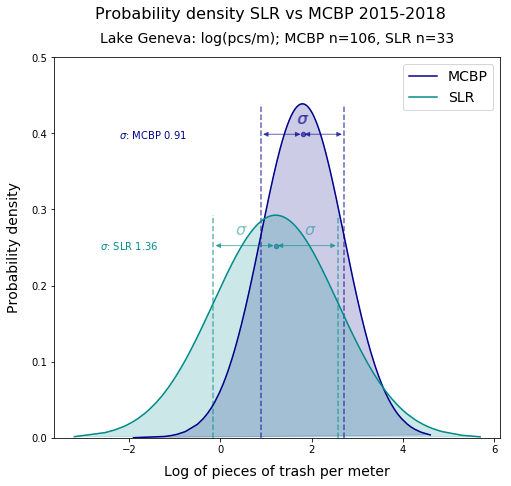

In [14]:
mcbp = list(lakeDailyPcsM[lakeDailyPcsM.Project == "MCBP"]["ln_pcs"])
slr = list(lakeDailyPcsM[lakeDailyPcsM.Project == "SLR"]["ln_pcs"])
thisList = [("MCBP",mcbp), ("SLR",slr)]
projectData =  makeXandYProject(thisList)
makeProjectDist(projectData, (8,7), ["darkblue", "darkcyan"], "graphs/distributions/logProject.svg")

#### Discussion

The distribution of MCBP falls entireley within the distribution of SLR. Further more almost 68% of the data from MCBP falls within one standard deviation of the mean of SLR.

There are other similarities between the two groups:

1. Repeated surveys over time
2. Active in the environmental field
3. Volunteers

The combined results of the two projects were combined to make up a representative population of "pieces of trash per meter of shore line".

### Comparing samples from other groups against the combined distribution

#### The results from SWE, PC and GIS were excluded from the combined distribution

In the same way that there are similarities between SLR and MCBP, there are charatersitics that make these groups unique. Making them representative of a random sample based on the same protocol.

1. Few samples (less experience)
2. SWE the particpants changed each year
3. GIS is elementary school children
4. Neither MCBP or SLR have samples at these locations

There is at least two ways to visualise the relationship between the population and the random sample:

1. Plot the cumulative distribution of MCBP and SLR combined
   1. Then plot the points from SWE, GIS and PC to see where they situate
2. Make a boxplot (25th, 50th and 75th) of MCBP and SLR
   1. Then plot the points from SWE, GIS and PC to see where they situate

We will do both

In [15]:
# this gets hidden
# Group the SLR and MCBP results:
xLsX = lakeDailyPcsM[lakeDailyPcsM.Project.isin(["SLR", "MCBP"])]
# Get the mean and standard deviation from that group:
xLsXStat = xLsX["pcs_m"].describe()
mu = xLsXStat["mean"]
sigma = xLsXStat["std"]
# Put the results in a list and sort
# This is empirical
xS = list(xLsX.pcs_m)
xS = sorted(xS)
# This is the log
xLnS = list(xLsX.ln_pcs)
xLnS = sorted(xLnS)

# Get the emprical results for the random samples
swePcs = list(lakeDailyPcsM[lakeDailyPcsM.Project == "SWE"]["pcs_m"])
gisPcs = list(lakeDailyPcsM[lakeDailyPcsM.Project == "GIS"]["pcs_m"])
pcPcs = list(lakeDailyPcsM[lakeDailyPcsM.Project == "PC"]["pcs_m"])

# Get the log of the results for the random samples
swePcsLn = list(lakeDailyPcsM[lakeDailyPcsM.Project == "SWE"]["ln_pcs"])
gisPcsLn = list(lakeDailyPcsM[lakeDailyPcsM.Project == "GIS"]["ln_pcs"])
pcPcsLn = list(lakeDailyPcsM[lakeDailyPcsM.Project == "PC"]["ln_pcs"])

In [16]:
# this gets hidden
# the data for the boxplots
dataOne = xS
dataTwo = xLnS
colorsBox = ["darkblue","darkcyan" ]

# data for the random samples
samplesOne = [swePcs, pcPcs, gisPcs]
samplesTwo = [swePcsLn, pcPcsLn, gisPcsLn]
colorsSamps = ["fuchsia", "indigo", "peachpuff"]
namesSamples = ["SWE", "PC", "GIS"]

# titles and file location
figTitle = "Distribution of combined results - MCBP & SLR, Lake Geneva 2015-2018"
axOneTitle = 'Plot of pcs/m'
axTwoTitle = 'Plot of Log(pcs/m)'
fileName = "graphs/distributions/combinedBox.svg"

#### The boxplots:

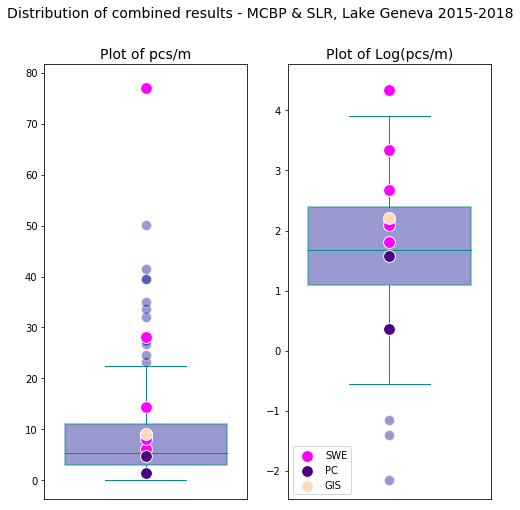

In [17]:
# call the function
sideBysideBoxPlots(dataOne, dataTwo, colorsSamps,colorsBox, namesSamples, 
                   samplesOne, samplesTwo, figTitle, axOneTitle, axTwoTitle, fileName)

#### The cumulative distribution:

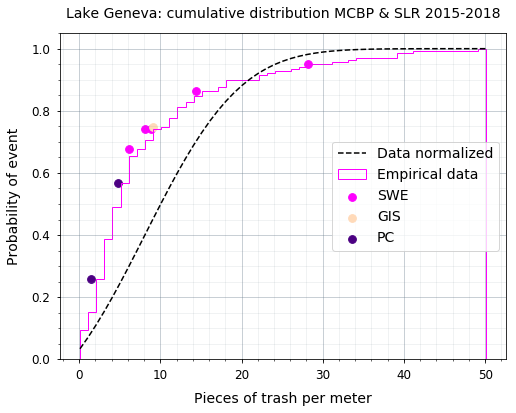

In [18]:
tryThis, results = makeCumlativeDist(xS, mu, sigma, 50, "Empirical data", "Data normalized",
                                     swePcs, gisPcs, pcPcs)

#### Discussion

Whether the empirical data or the log transform* is used five of the nine samples fall within the interquartile range**. As was seen earlier when all the results are conisedered the shift to the right caused by the log transform captures eight of the nine samples.

The whiskers account for > 99% of all possible values in the distribution. With the exception of the two extreme values the combined distribution accounts for all the random samples.

*This is the distribution of the log of the actual values __not a sample based on the average and standard deviation__

**There are two samples with almost identical values that make this difficult to see.

![topTenPlageDeStSulpiceOct2017.svg](topTenPlageDeStSulpiceOct2017.svg) | ![Plage-de-St-SulpicetopTenBoxLocation.svg](Plage-de-St-SulpicetopTenBoxLocation.svg)

<tr>
    <td> <img src="graphs/barCharts/topTenPlageDeStSulpiceOct2017.svg" alt="Drawing" style=""/> </td>
    <td> <img src="graphs/distributions/Plage-de-St-SulpicetopTenBoxLocation.svg" alt="Drawing" style=""/> </td>
    </tr>

In [19]:
# the data for the boxplots
dataOne = xS
dataOneDist = [xS, makePdf([xS, makeAve(xS), makeStd(xS)])]
#dataOneDist[1] = [number*10 for number in dataOneDist[0]]
dataTwo = xLnS
dataTwoDist = [xLnS, makePdf([xLnS, makeAve(xLnS), makeStd(xLnS)])]
colorsBox = ["darkblue","darkcyan" ]

# data for the random samples
samplesOne = [swePcs, pcPcs, gisPcs]
samplesTwo = [swePcsLn, pcPcsLn, gisPcsLn]
colorsSamps = ["fuchsia", "indigo", "peachpuff"]
namesSamples = ["SWE", "PC", "GIS"]

mu = xLsXStat["mean"]
sigma = xLsXStat["std"]

### Comparing top-ten

In [20]:
stSulpiceCode = beachDf(lakeCodePcsM, "Plage-de-St-Sulpice")
octStSulpice = getOneSurvey(stSulpiceCode, "2017-10-05")
c,d = codes()

In [21]:
lakeCodePcsM["project_id"] = lakeCodePcsM["location_id"].map(beachProjectDict)

In [22]:
codeList, topTenDict = getCodesAndPcs(sortByPcs(octStSulpice), 10, "code_id")
oneDayPcsM= getOneDayPcsM(lakeDailyPcsM, "2017-10-05", "Plage-de-St-Sulpice")
codeDefsLocation = getCodeDefs(c, topTenDict)

In [23]:
pcsMfreq = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").code_id.count()
pcsMmax = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").pcs_m.max()
pcsMmean = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").pcs_m.mean()
pcsMmin = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").pcs_m.min()
pcsStd = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").pcs_m.std()
pcsMtotal = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby("code_id").quantity.sum()
pcsMlocs = lakeCodePcsM[lakeCodePcsM.project_id.isin(["SLR", "MCBP"])].groupby(["code_id", "location_id"]).location_id.count()

In [24]:
tenKeys = list(topTenDict.keys())
thePop = lakeCodePcsM[(lakeCodePcsM.project_id.isin(["SWE", "MCBP"])) &(lakeCodePcsM.code_id.isin(tenKeys))][["code_id", "pcs_m"]]
theSamp = pd.DataFrame.from_dict(topTenDict, orient="index")
theSamp.reset_index(inplace=True)
theSamp.rename(columns={"index":"code_id"}, inplace=True)

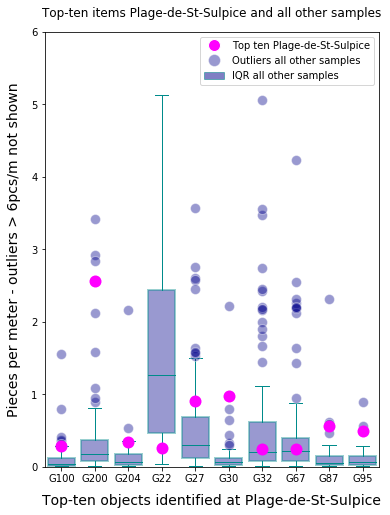

In [25]:
topTenBoxLocation(thePop, theSamp, "code_id", "pcs_m", 6,"Plage-de-St-Sulpice")


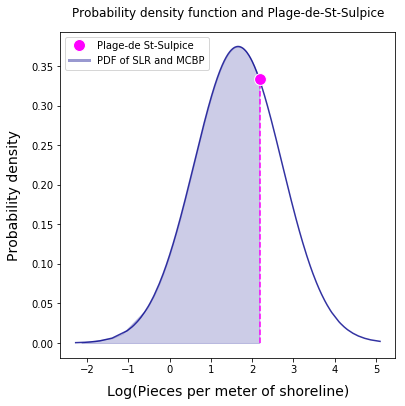

In [26]:
popDistX = makeXandY([dataTwo])
popDist = [popDistX[0][0],popDistX[0][1]]
samp = [oneDayPcsM["ln_pcs"]]
fillX = [x for x in dataTwo if x <= samp[0]]
fillXandY = [dataTwoDist[0][:98], dataTwoDist[1][:98]]
sampY = 0.3332155451192267
pointDistribution(popDist, fillXandY, samp, sampY,"Plage-de St-Sulpice", "PDF of SLR and MCBP",
                  "Probability density function and Plage-de-St-Sulpice", "graphs/distributions/StSulpicePoint.svg")

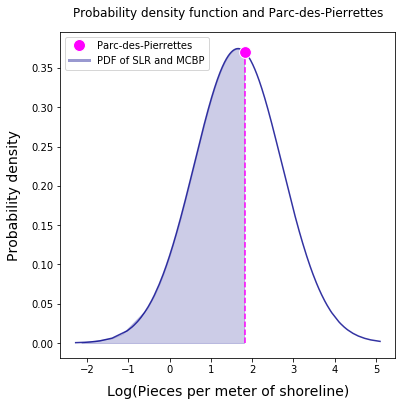

In [27]:
samp = [lakeDailyPcsM[(lakeDailyPcsM.location == "Parc-des-Pierrettes")&(lakeDailyPcsM.date == "2017-10-05")]["ln_pcs"].item()]
fillX = [x for x in dataTwo if x <= samp[0]]
stop=len(fillX)
fillXandY = [dataTwoDist[0][:stop], dataTwoDist[1][:stop]]
sampY =  dataTwoDist[1][stop]

pointDistribution(popDist, fillXandY, samp, sampY, "Parc-des-Pierrettes", "PDF of SLR and MCBP",
                  "Probability density function and Parc-des-Pierrettes",  "graphs/distributions/parcDePierrettesPoint.svg")

### Results per day

1. Top ten objects
2. Daily results grouped by source
3. Daily results grouped by material

This includes grouping descriptions for the legend

#### Get the data

Call the following functions:

1. theDataFromOneLocation = beachDf(_nameofTheDataFrame_, _nameOfTheBeach_)
2. theDataFromOneDay = getOneSurvey(_theDataFromOneLocation_, _theDate_)
3. thePcsMTotalForThatDay = getOneDayPcsM(_nameofTheDataFrame_, _theDate_, _nameOfTheBeach_)

In [28]:
# 1
stSulpiceCodeData = beachDf(lakeCodePcsM, "Plage-de-St-Sulpice")
# 2
stSulpiceOctCode = getOneSurvey(stSulpiceCodeData, "2017-10-05")
# 3
stSulpiceOctPcsM= getOneDayPcsM(lakeDailyPcsM, "2017-10-05", "Plage-de-St-Sulpice")

#### Define the data for the top ten chart

Call the follwoing functions:

4. thisDaySorted = sortedByPcs(_resultsFromGetOneSurvey_)
5. theListofCodes, topTenDict = getCodesAndPcs(_thisDaySorted_, _numberOfRows_, _theColumn_)
    1. Gives two results aList and aDict: aDict gets fed to the charting function
6. getCodeDefs(_theCodeDataFrame, _topTenDict_ )
    1. This attaches the description of each code to the codes in the top ten

In [29]:
# 4, 5
codeList, stSulpiceOctTopTen = getCodesAndPcs(sortByPcs(stSulpiceOctCode), 10, "code_id")
#6
wontCallThisVariableTen = getCodeDefs(c, stSulpiceOctTopTen)

#### Define the data for the sources and material chart

Call the follwoing functions:

7. thisDaySorted = sortedByPcs(_resultsFromGetOneSurvey_)
8. theListofCodes, topTenDict = getCodesAndPcs(_thisDaySorted_, _numberOfRows_, _theColumn_)
    1. Gives two results aList and aDict: aDict gets fed to the charting function
9. getCodeDefs(_theCodeDataFrame, _topTenDict_ )
    1. This attaches the description of each code to the codes in the top ten
    
    
#### Just need to chnage the number of rows called from the getCodesAndPcs function

In [30]:
# 7, 8
sourceCodeList, stSulpiceOctSources = getCodesAndPcs(sortByPcs(stSulpiceOctCode), "all", "code_id")
#9
wontCallThisVariableSource = getCodeDefs(c, stSulpiceOctSources)

#### Get the source and material identifiers from the data:

Call the following functions:

10. sources = list(c["source"].unique())
11. materials = list(c["material"].unique())

In [31]:
# 10
sources = list(c["source"].unique())
#11
materials = list(c["material"].unique())

#### combine the discriptions for the legend

Call the following functions (once for materials and once for sources)

12. sourceDescriptions = makeDescription(getCodeDefs(c, stSulpiceOctSources), sources, 'source')
13. do that again for materials


In [32]:
# 12
sourceDescriptions = makeDescription(getCodeDefs(c, stSulpiceOctSources), sources, 'source')
sulpiceSourceBar = makeStrings(combineDescription(sourceDescriptions))
materialDescriptions = makeDescription(getCodeDefs(c, stSulpiceOctSources), materials, 'material')
sulpiceMaterialBar = makeStrings(combineDescription(materialDescriptions ))

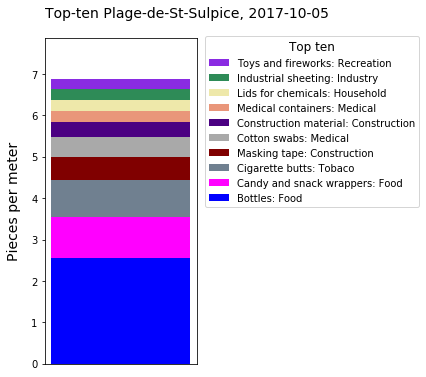

In [33]:
topTenLocation(stSulpiceOctTopTen,stSulpiceOctPcsM, colorTopTen, "PlageDeStSulpiceOct2017")

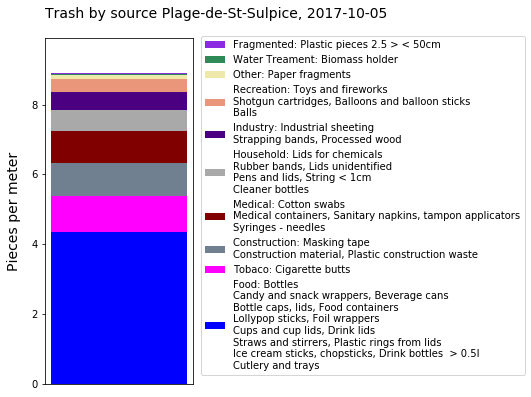

In [34]:
topTenLocations(sulpiceSourceBar,stSulpiceOctPcsM, "Trash by source", colorTopTen,  "PlageDeStSulpiceSourcesOct2017.svg")

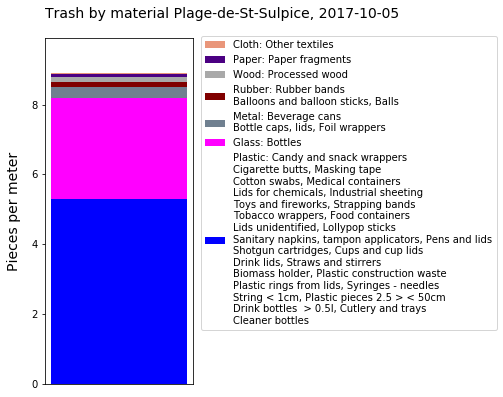

In [35]:
topTenLocations(sulpiceMaterialBar,stSulpiceOctPcsM, "Trash by material", colorTopTen,  "PlageDeStSulpiceMaterialOct2017.svg")

In [36]:
pierrettesCode = beachDf(lakeCodePcsM, "Parc-des-Pierrettes")
octPierrettes = getOneSurvey(pierrettesCode, "2017-10-05")
codeList, pierrtteTenDict = getCodesAndPcs(sortByPcs(octPierrettes), 10, "code_id")
pierretteDayPcsM= getOneDayPcsM(lakeDailyPcsM, "2017-10-05", "Parc-des-Pierrettes")
codeDefsLocation = getCodeDefs(c, pierrtteTenDict)

In [37]:
sourceCodeList, pierretteOctSources = getCodesAndPcs(sortByPcs(octPierrettes), "all", "code_id")
wontCallThisVariableSource = getCodeDefs(c, pierretteOctSources)

In [38]:
# 12
sourceDescriptionsPierrettes = makeDescription(wontCallThisVariableSource , sources, 'source')
pierretteSourceBar = makeStrings(combineDescription(sourceDescriptionsPierrettes))
# 13
materialDescriptionsPierrettes = makeDescription(wontCallThisVariableSource, materials, 'material')
pierretteMaterrialBar = makeStrings(combineDescription(materialDescriptionsPierrettes))

In [39]:
tenKeys = list(pierrtteTenDict.keys())
thePop = lakeCodePcsM[(lakeCodePcsM.project_id.isin(["SWE", "MCBP"])) &(lakeCodePcsM.code_id.isin(tenKeys))][["code_id", "pcs_m"]]
theSamp = pd.DataFrame.from_dict(pierrtteTenDict, orient="index")
theSamp.reset_index(inplace=True)
theSamp.rename(columns={"index":"code_id"}, inplace=True)

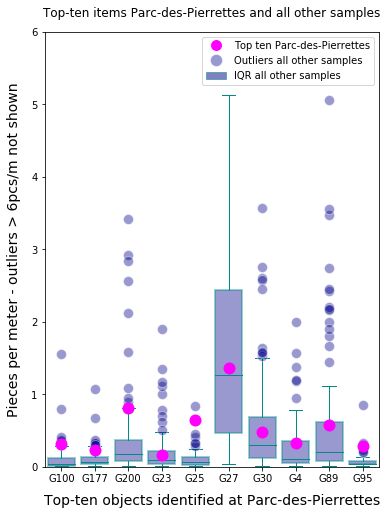

In [40]:
topTenBoxLocation(thePop, theSamp, "code_id", "pcs_m", 6,"Parc-des-Pierrettes")

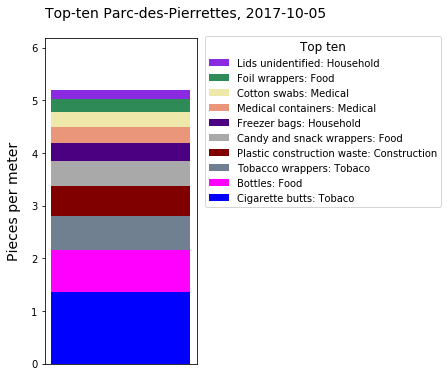

In [41]:
topTenLocation(pierrtteTenDict,pierretteDayPcsM, colorTopTen, "PierretteOct2017")

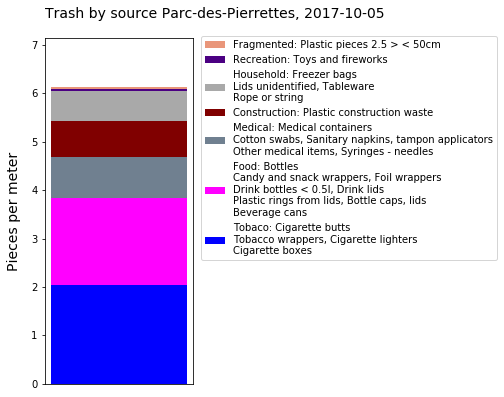

In [42]:
topTenLocations(pierretteSourceBar,pierretteDayPcsM, "Trash by source", colorTopTen,  "pierrettesSourceOct2017.svg")

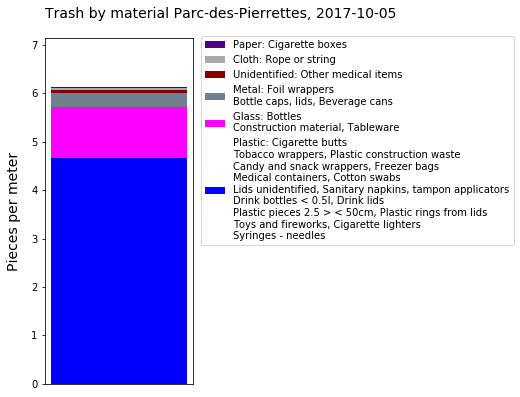

In [43]:
topTenLocations(pierretteMaterrialBar,pierretteDayPcsM, "Trash by material", colorTopTen,  "pierrettesMaterialOct2017.svg")